# To predict compensation of an Employee

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.stats.api as sms
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split,cross_val_score
from scipy import stats
from scipy.stats import chi2_contingency,ttest_ind


from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv(r'D:\DATA SCEINCE\9.GIT HUB\SLR\employee-compensation.csv')

In [73]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [14]:
df.iloc[:,:10].head(4)

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Union Code,Union,Job Family
0,1,1000,1021,Calendar,2013,Public Protection,ADP,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems
1,1,1000,1023,Calendar,2013,Public Protection,ADP,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems
2,1,1000,1031,Calendar,2013,Public Protection,ADP,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems
3,1,1000,1054,Calendar,2013,Public Protection,ADP,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems


In [15]:
df.iloc[:,10:].head(4)

,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37


In [35]:
df.shape

(683277, 22)

In [36]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [64]:
df.isnull().sum()

Job Family Code         0
Job Code                0
Year                    0
Organization Group      0
Department Code         2
Union Code            351
Job                     5
Salaries                0
Overtime                0
Other Salaries          0
Total Salary            0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Benefits          0
Total Compensation      0
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
df.reset_index(inplace=True)

In [5]:
df.drop('index',inplace=True,axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [6]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(525694, 22)

In [7]:
df.Year=df.Year.astype("O")
df['Union Code']=df['Union Code'].astype('O')
df['Organization Group Code']=df['Organization Group Code'].astype('O')

In [8]:
df_cat=df.select_dtypes(include='O')
df_cat.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job'],
      dtype='object')

In [9]:
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

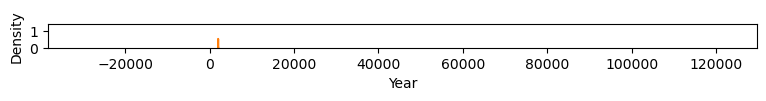

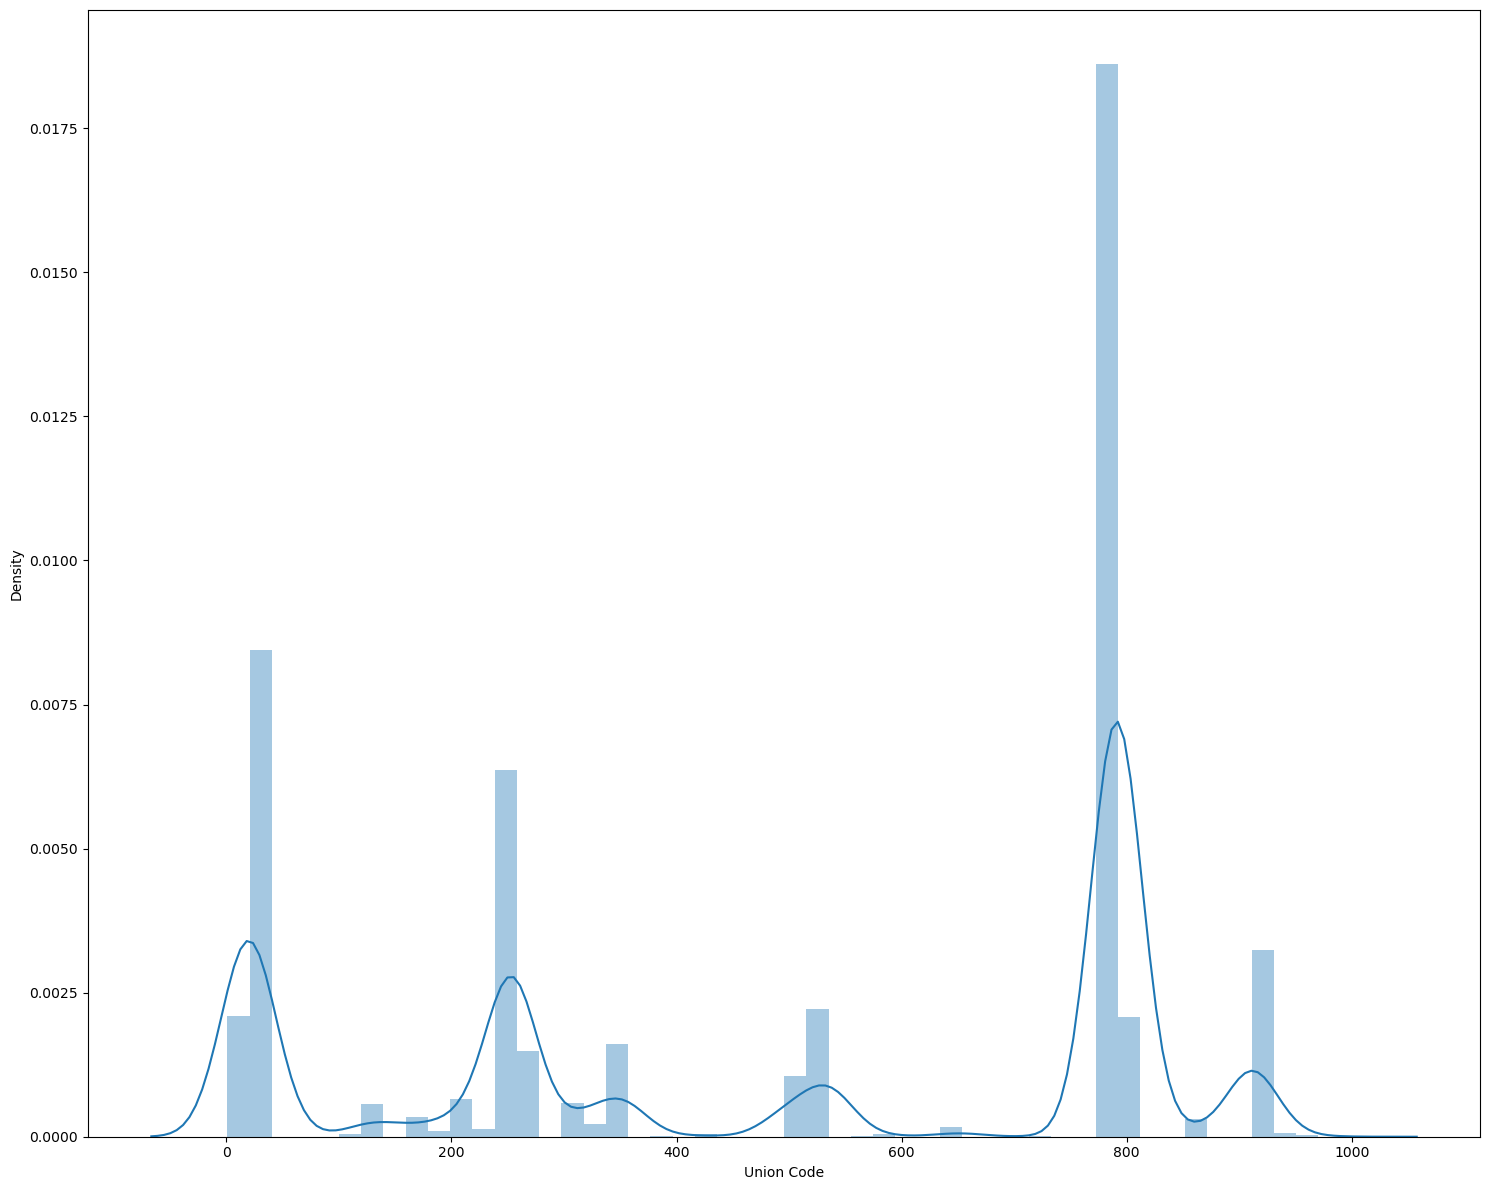

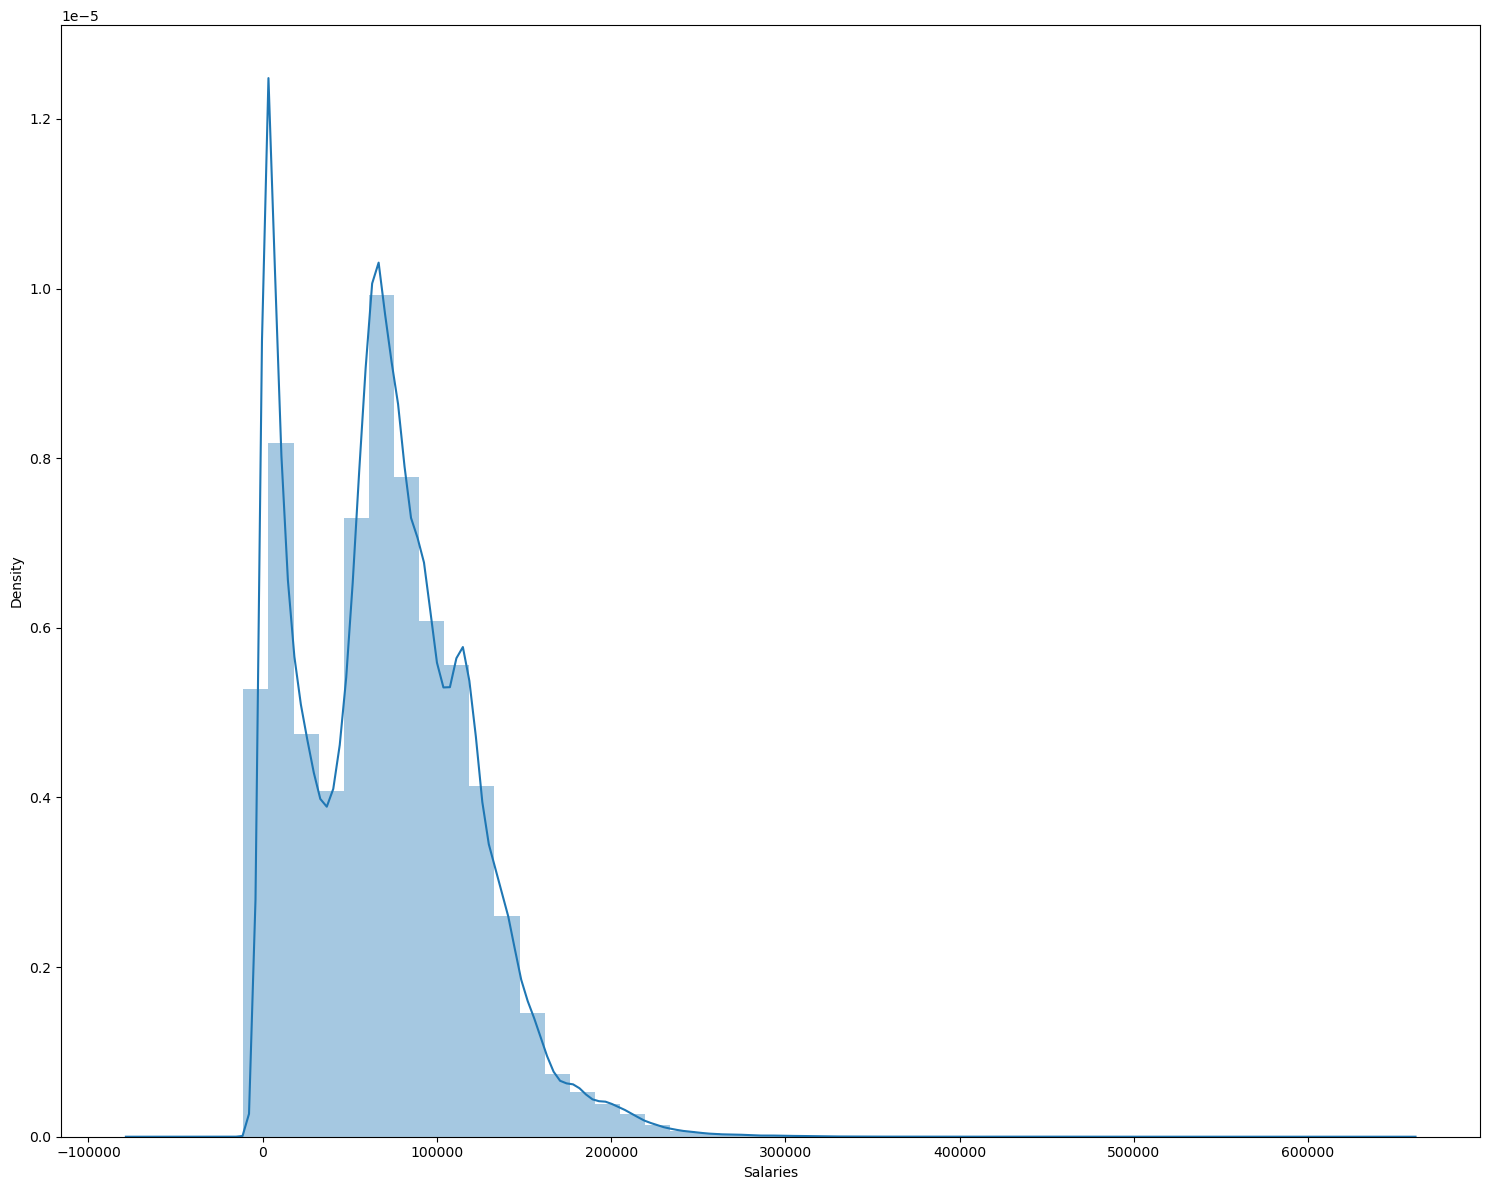

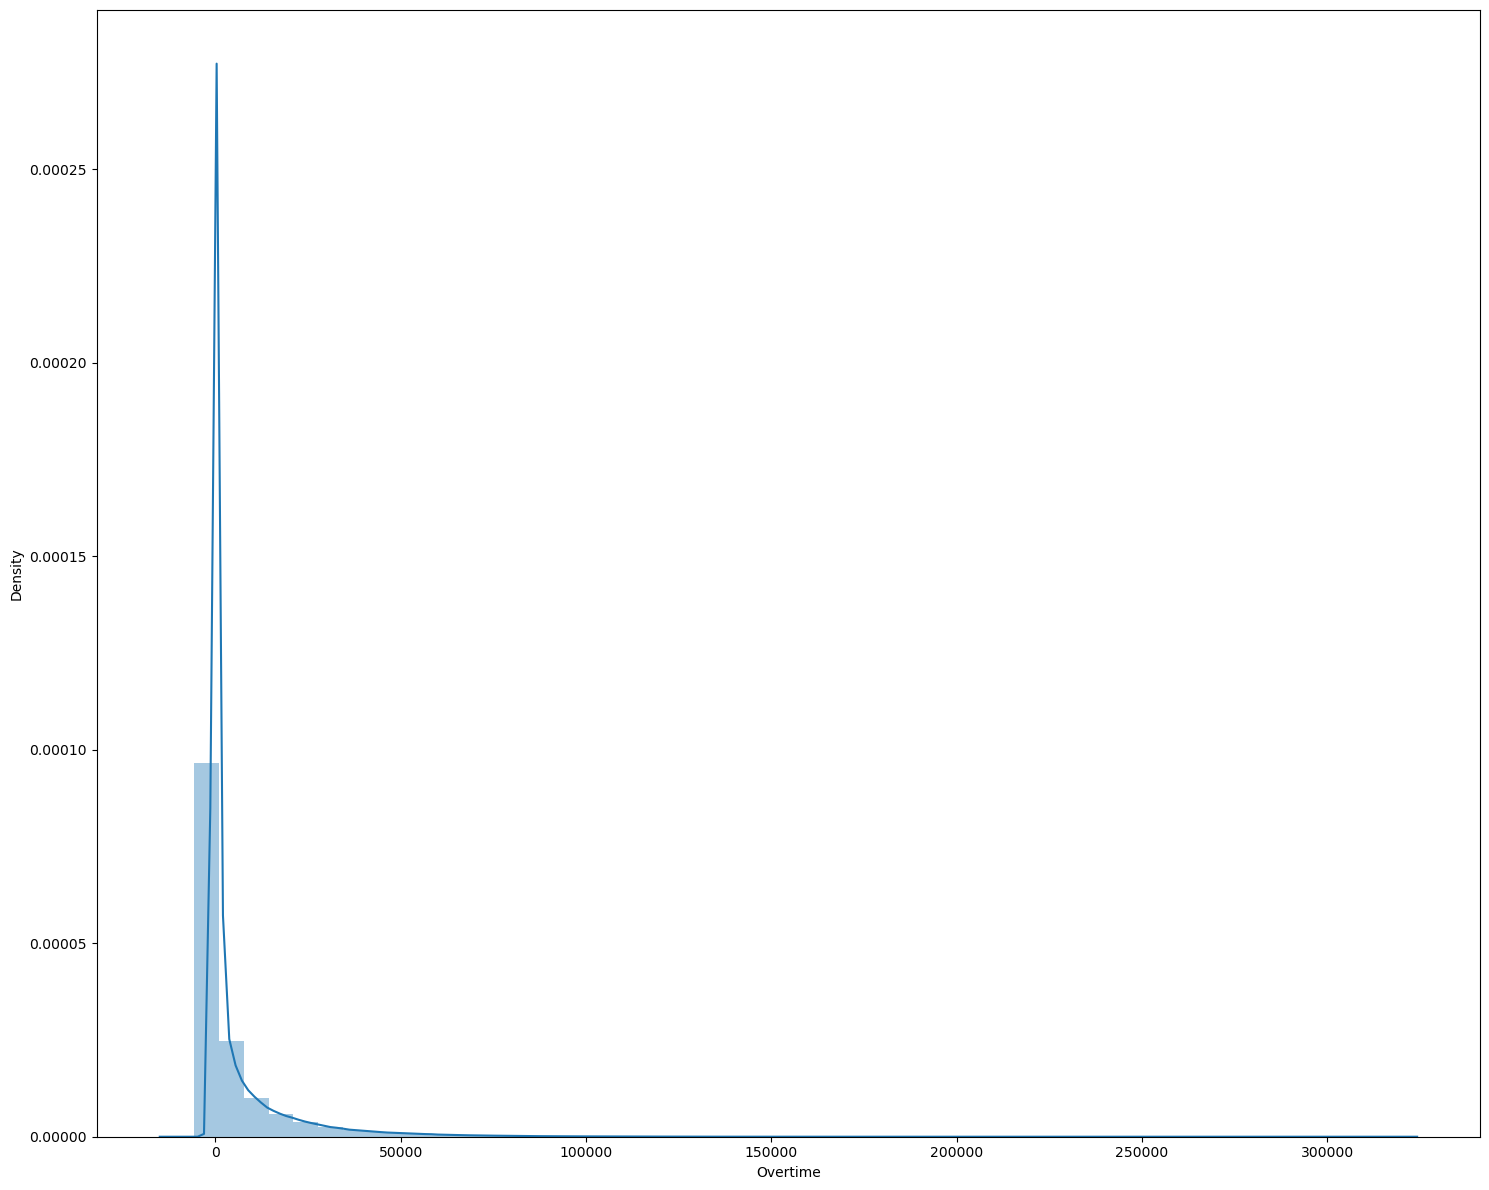

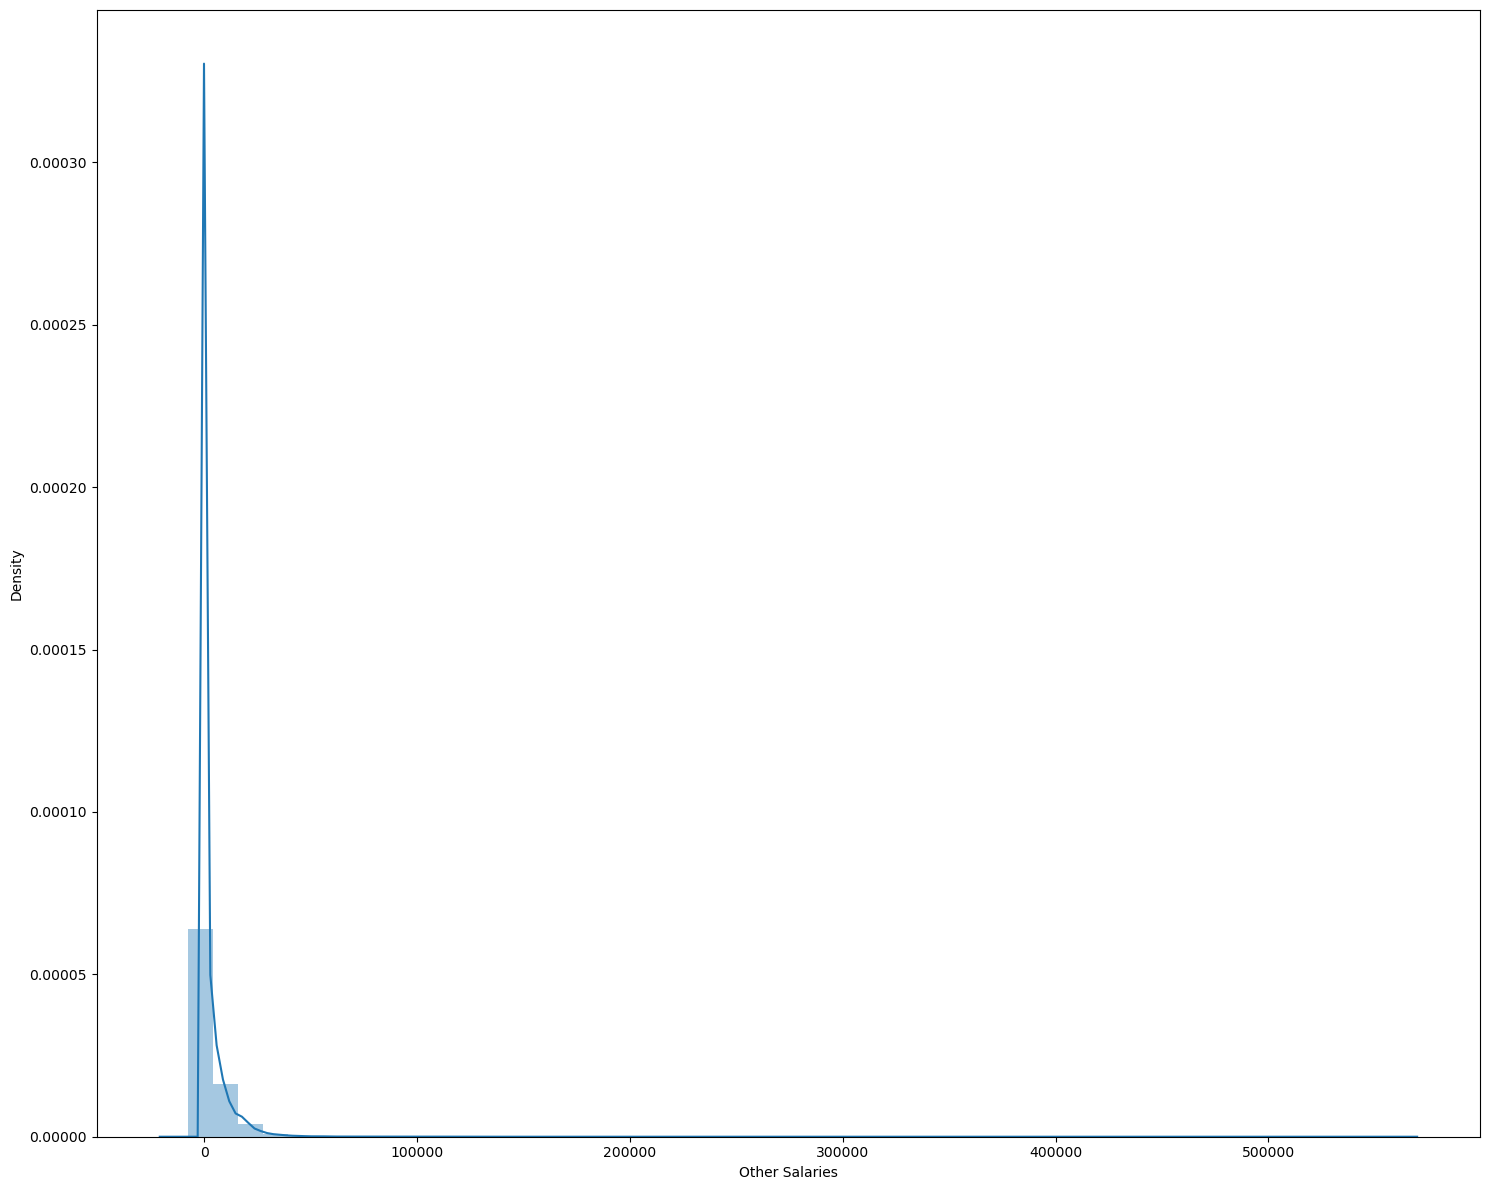

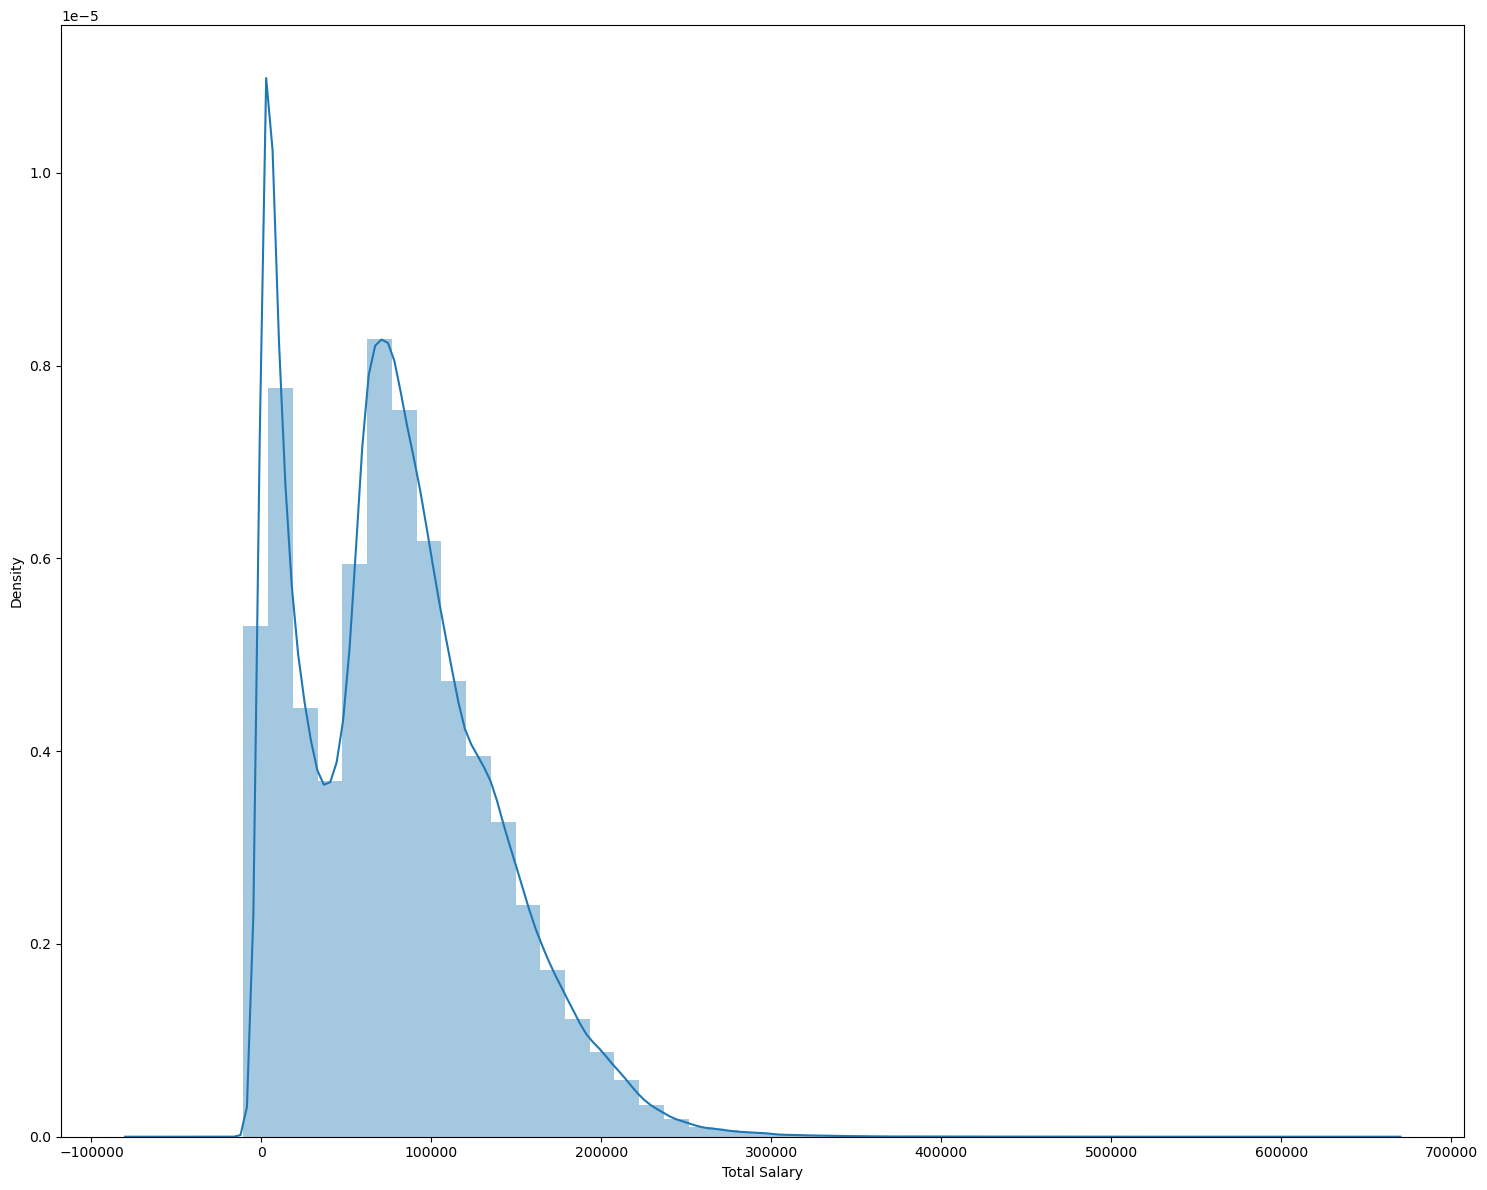

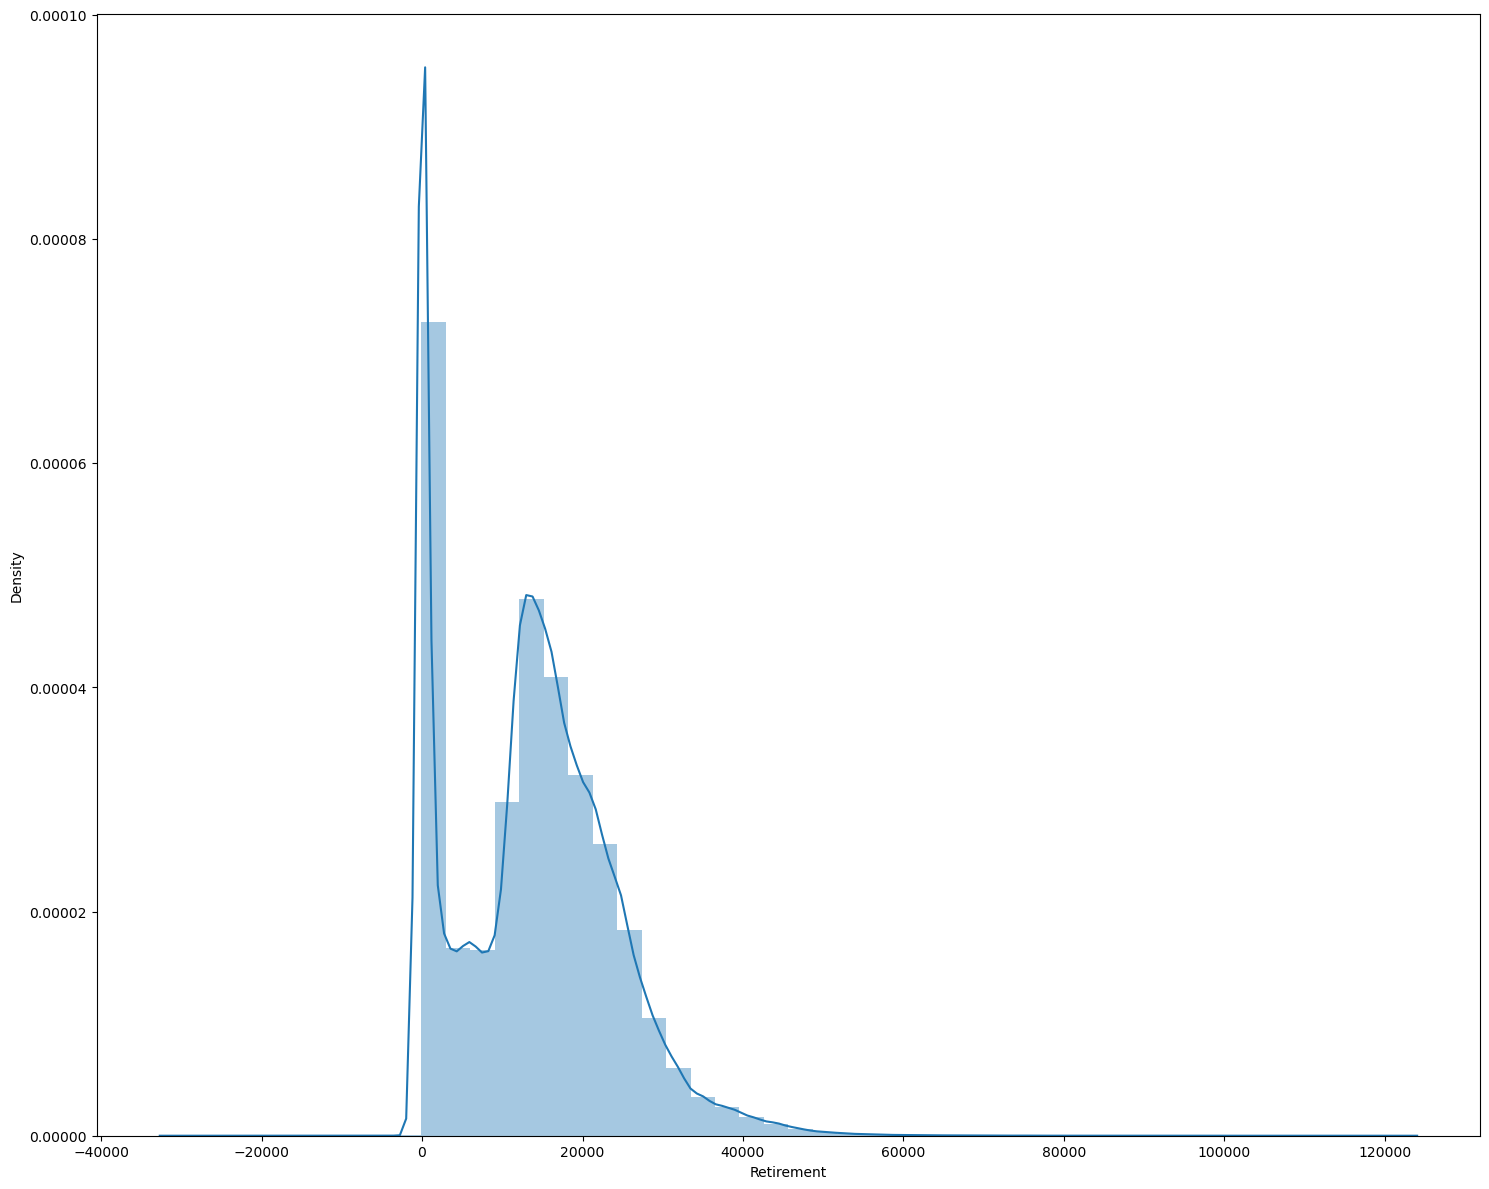

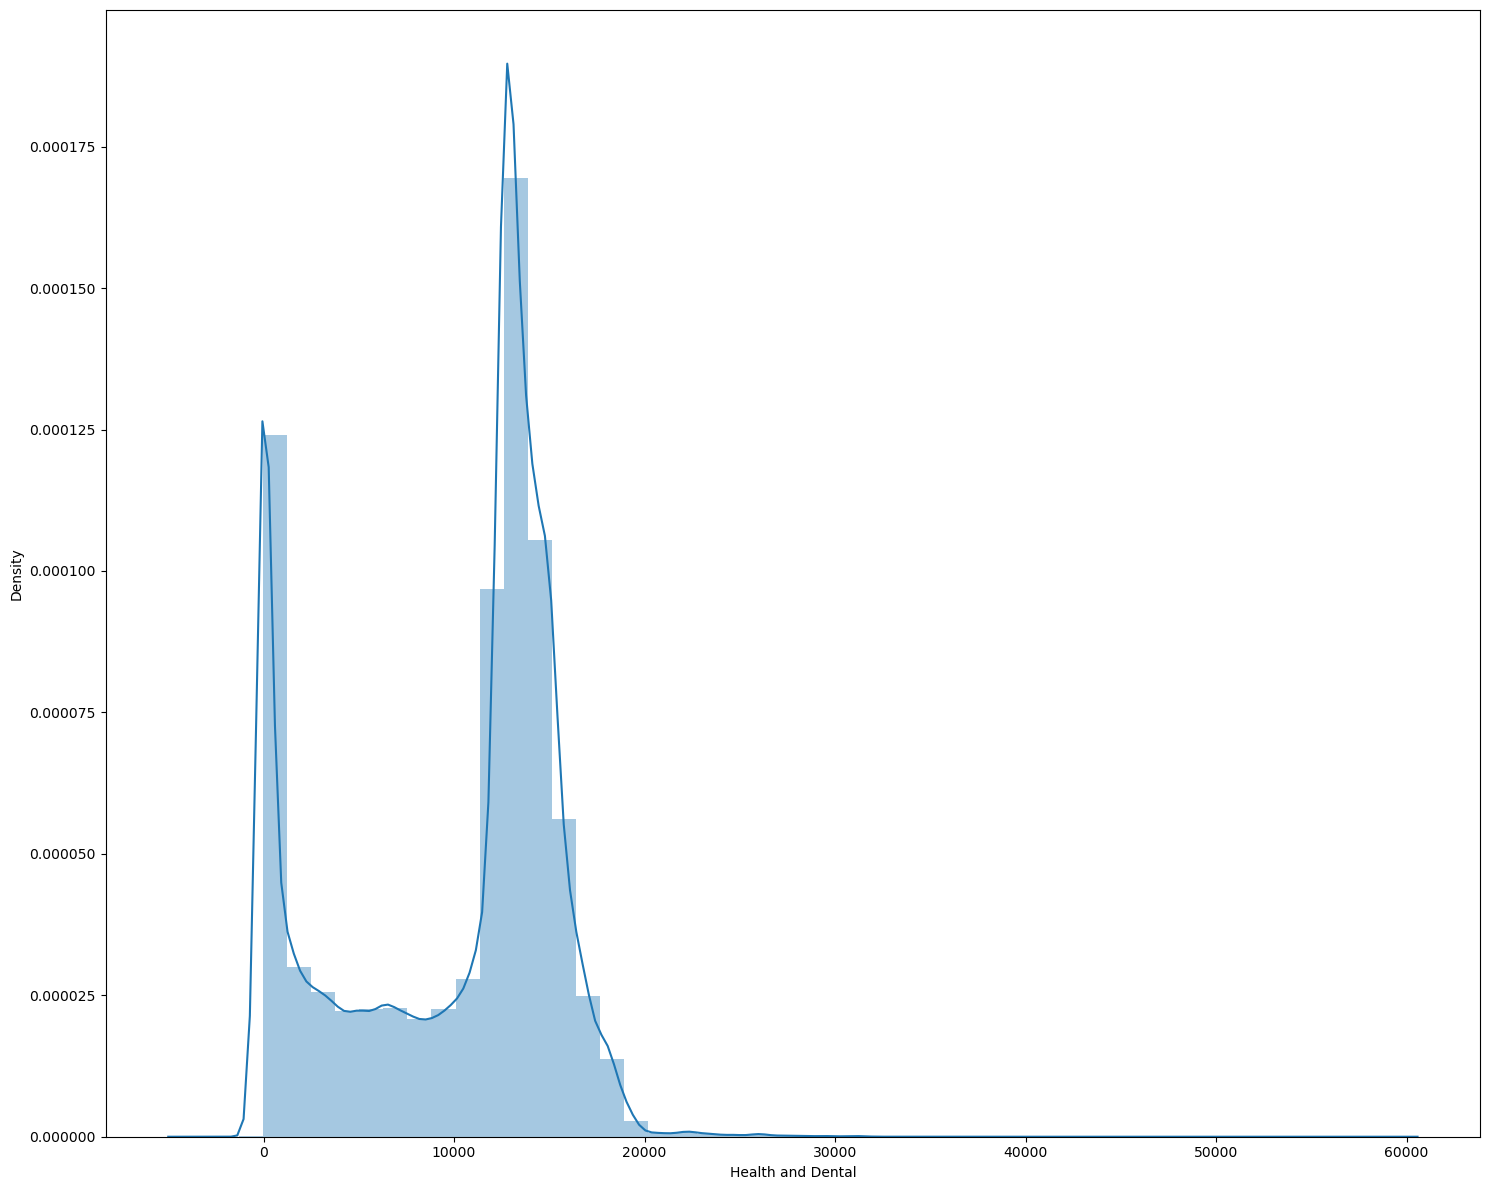

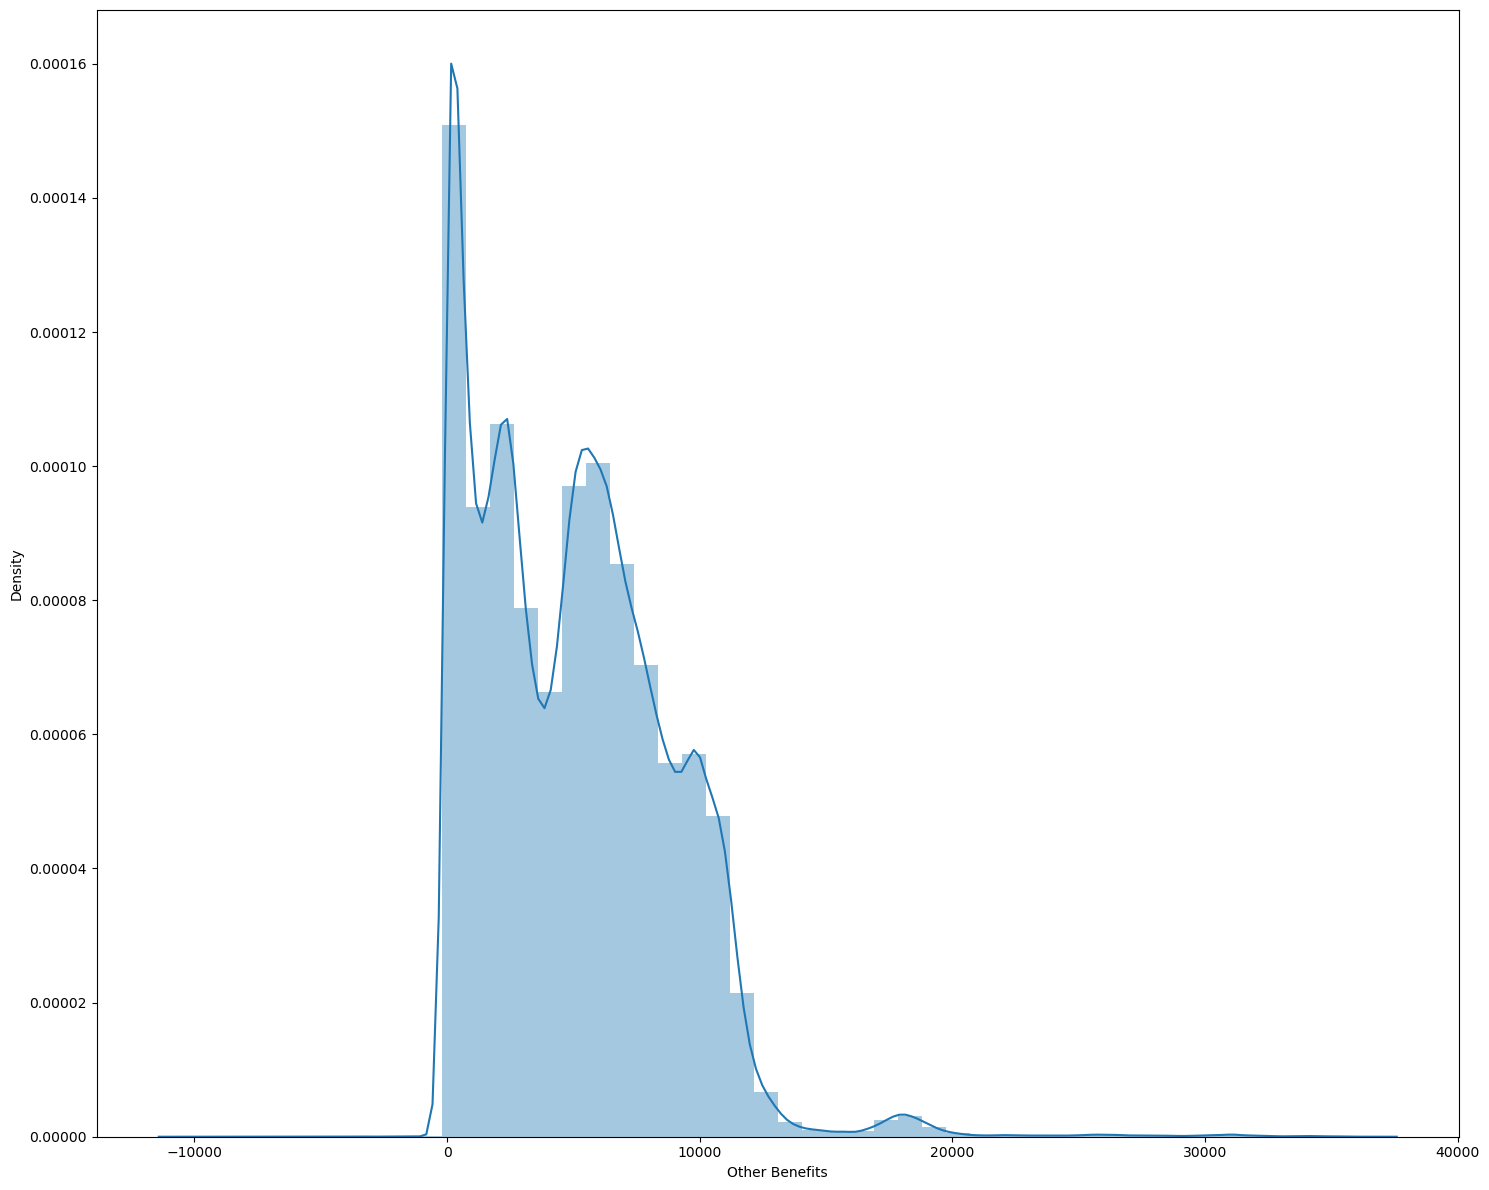

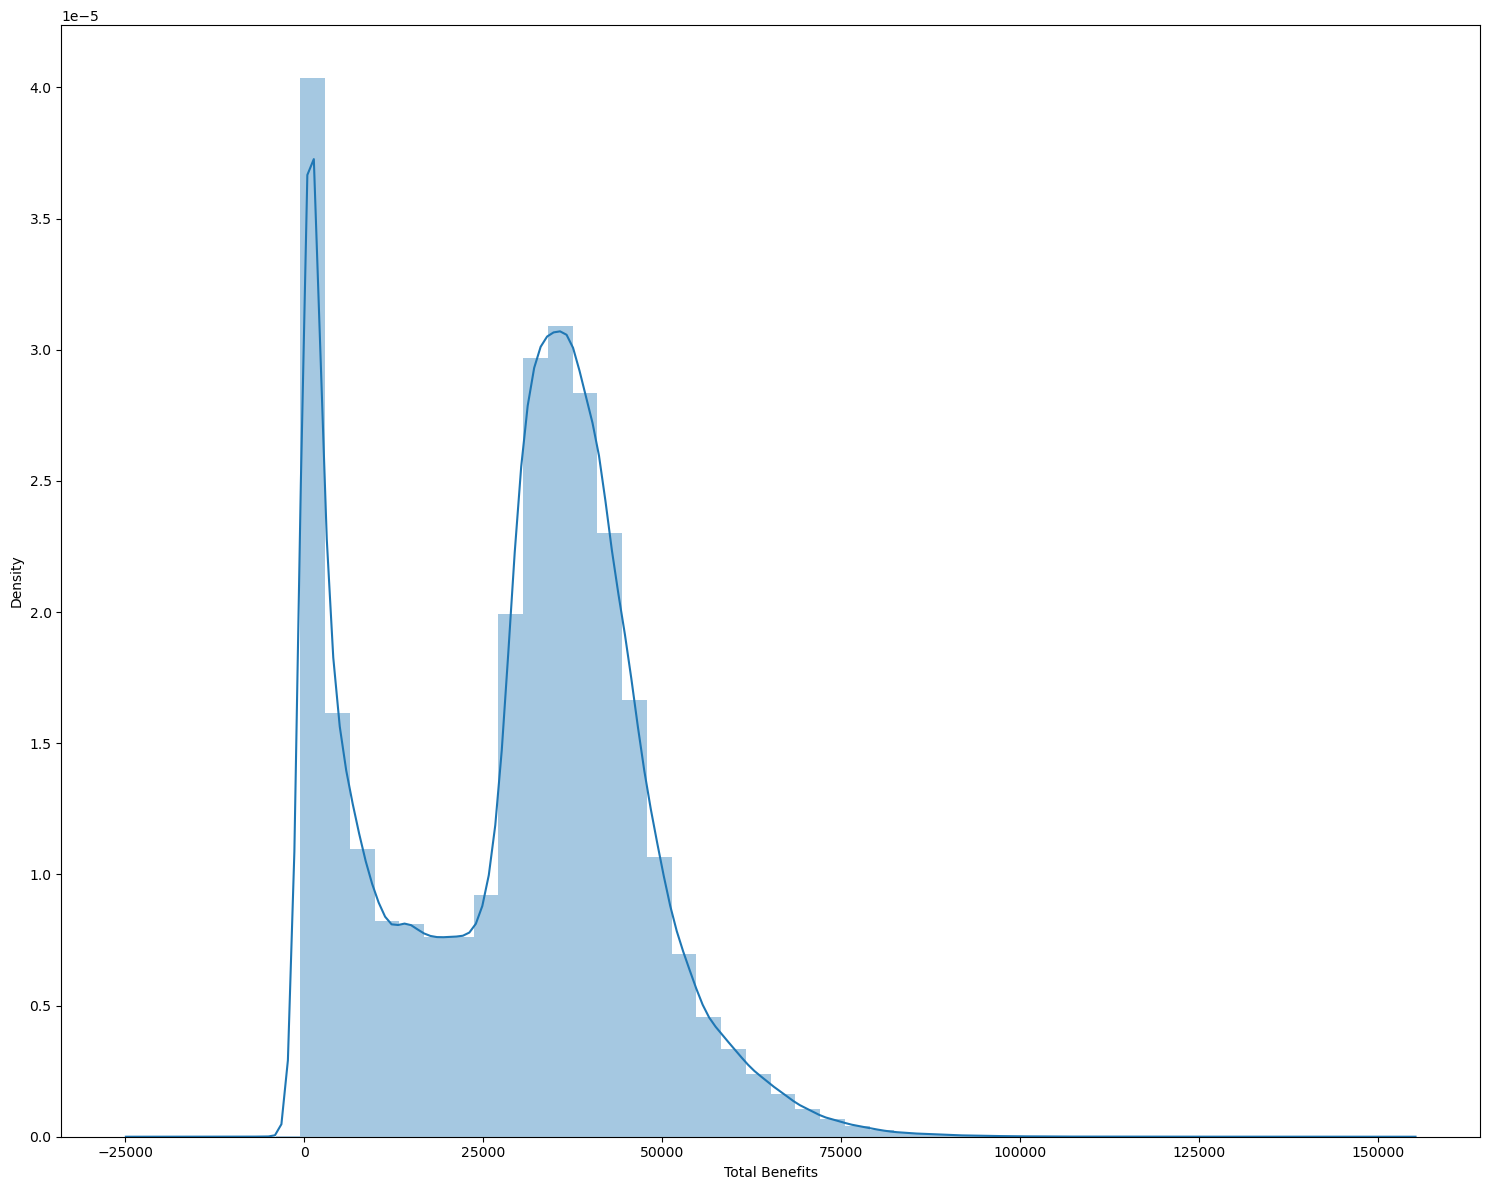

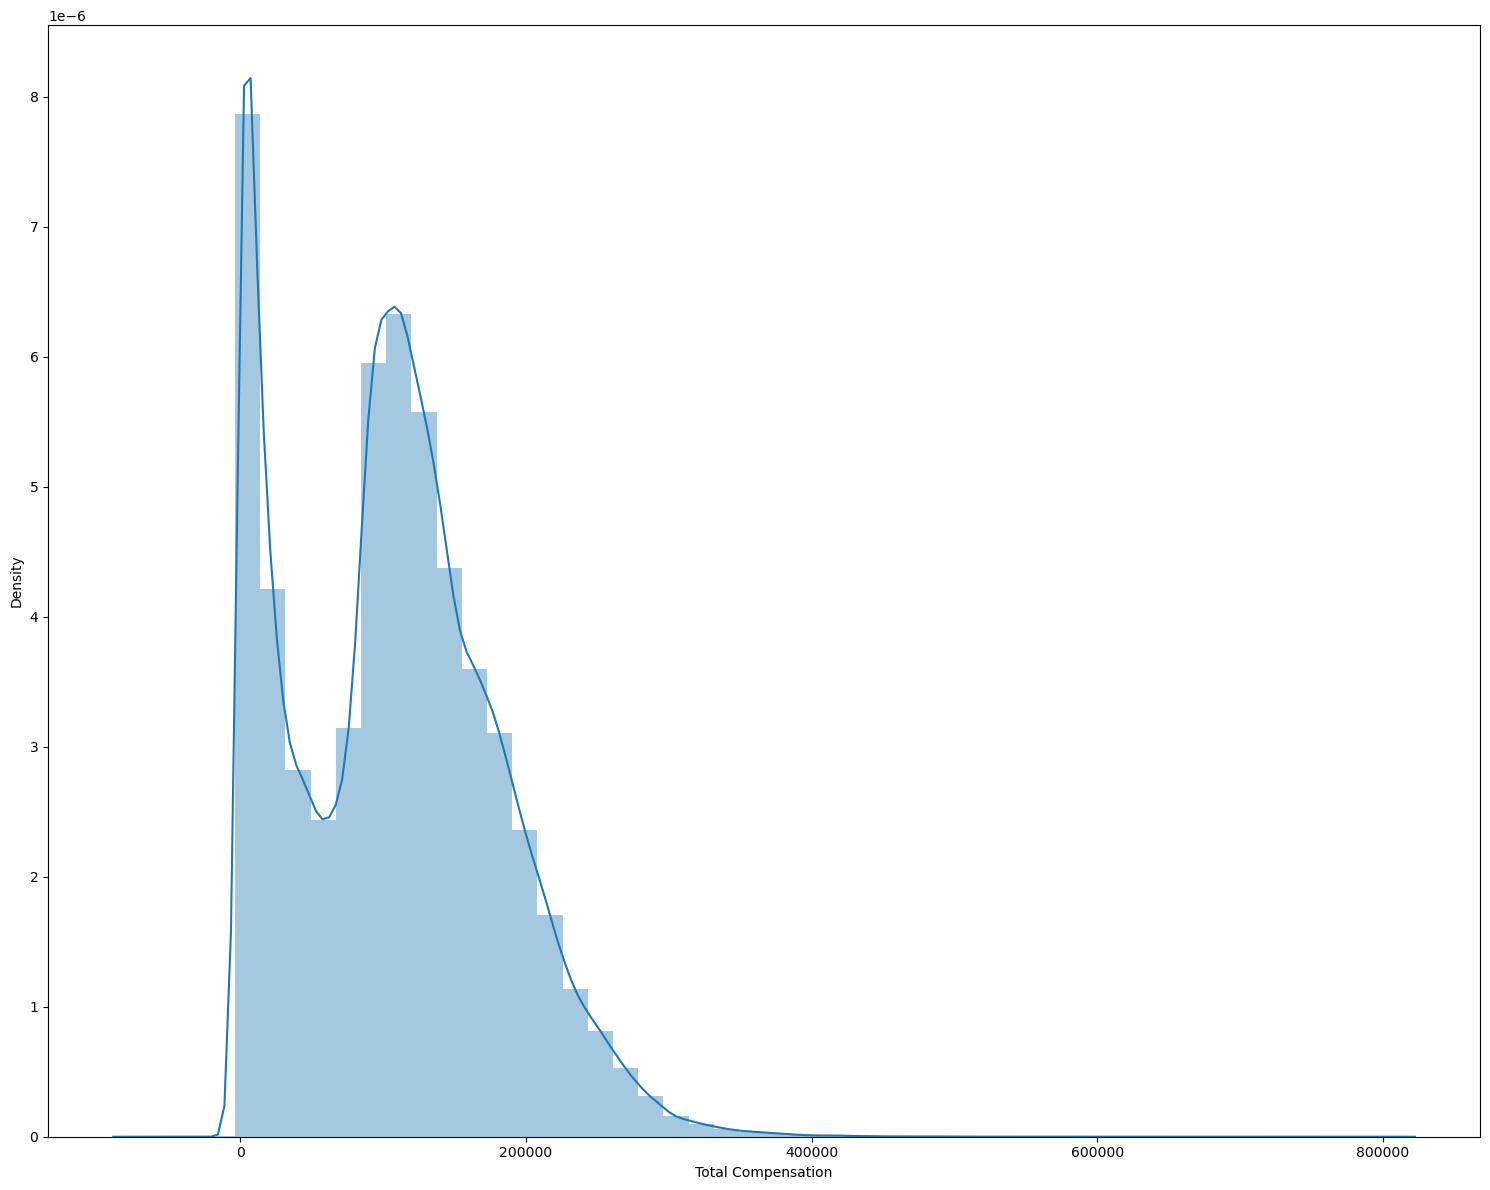

In [90]:
x=1
#plt.rcParams['figure.figsize']=(15,12)
for i in df_num.columns:
    sns.distplot(df1[i])
    plt.show()

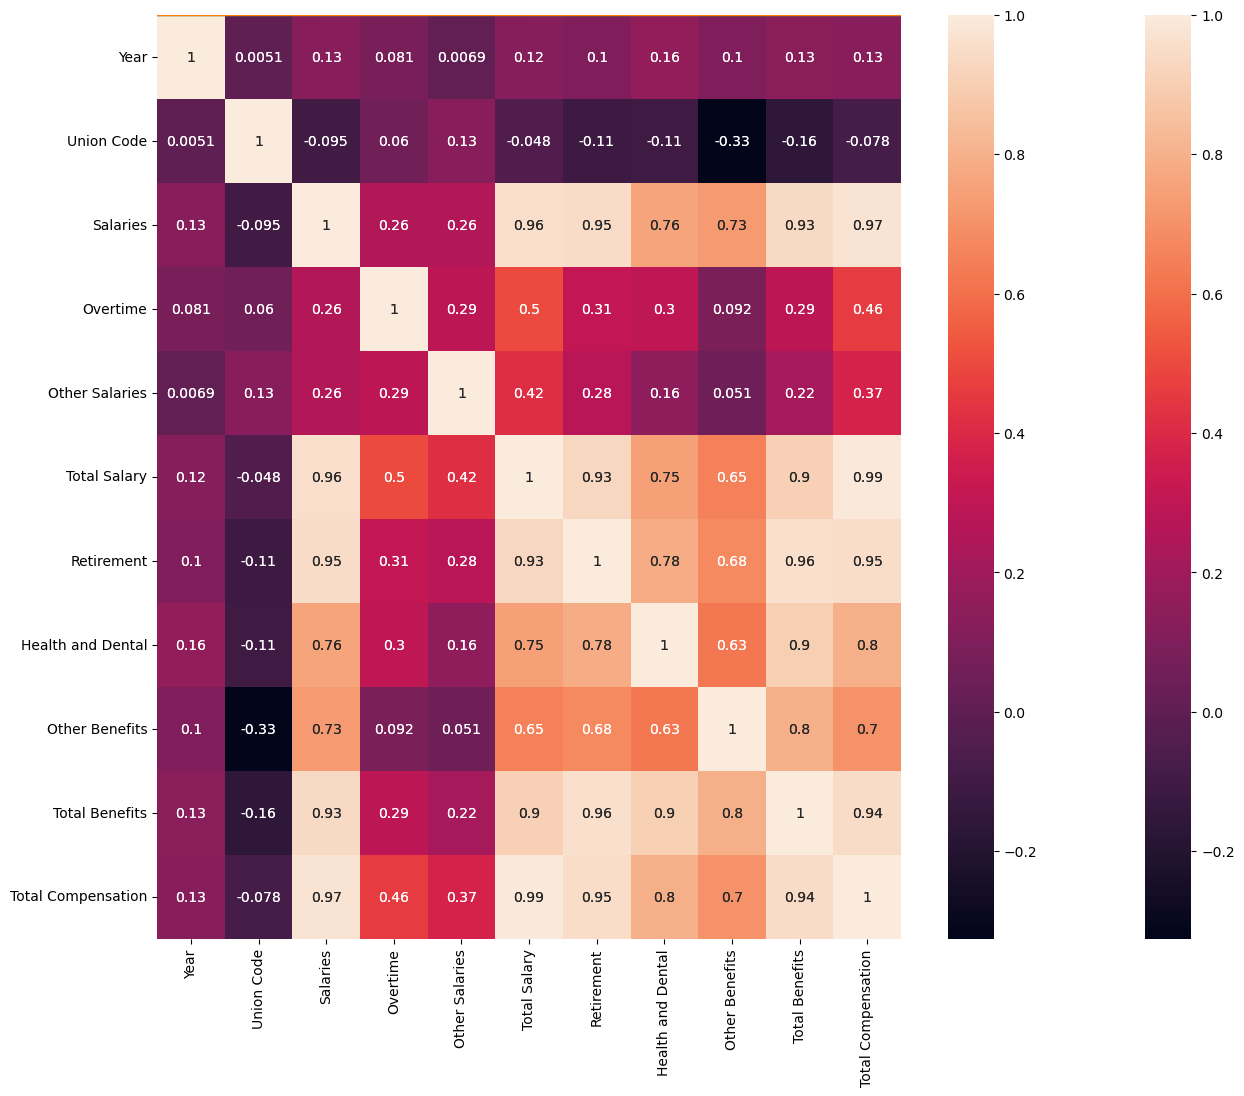

In [99]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [87]:
for i in df_cat.columns:
    print('Name of categorie :',i)
    print('No of categories :',len(df1[i].value_counts()))
    print(df_cat[i].value_counts(normalize=True)*100)
    print('-------------')

Name of categorie : Job Family Code
No of categories : 59
2300              10.408262
9100               8.355603
Q000               6.197660
7300               5.845642
2900               5.139848
9900               4.681082
1400               4.338435
H000               4.107076
2700               3.251044
0900               3.089385
1800               2.970045
3200               2.943687
8200               2.937391
5200               2.903419
8300               2.659173
1000               2.454464
8100               2.232036
2500               2.071256
1600               1.998919
3600               1.822910
2400               1.717627
1200               1.472942
5300               1.319044
7500               1.313772
3400               1.081827
9200               0.969661
7200               0.968929
0000               0.879314
7400               0.852956
SCRT               0.779448
2200               0.754994
9700               0.738594
2600               0.723512
1900              

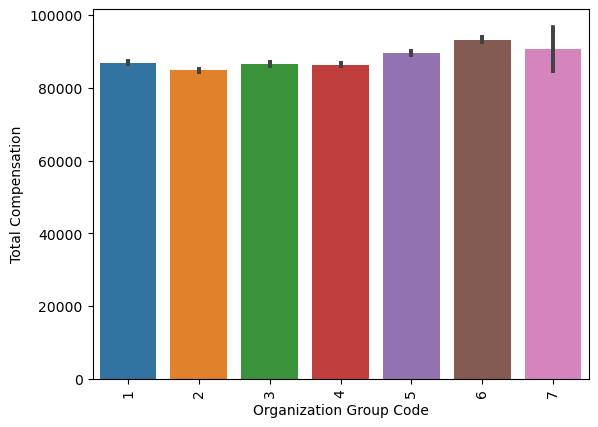

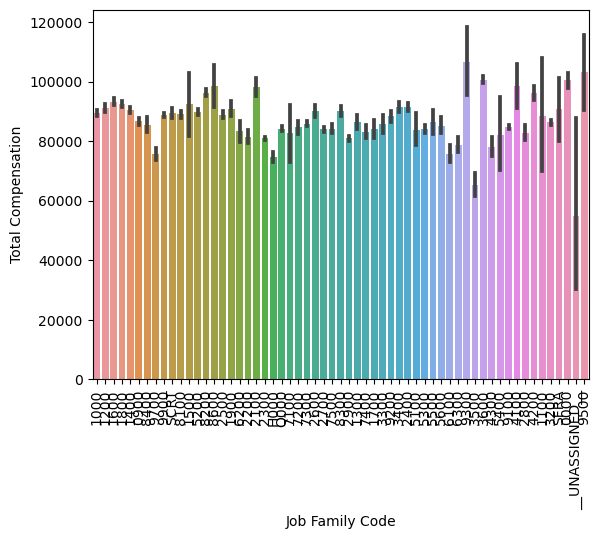

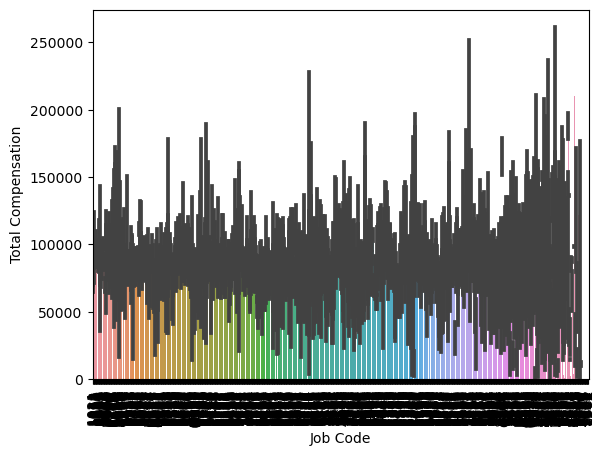

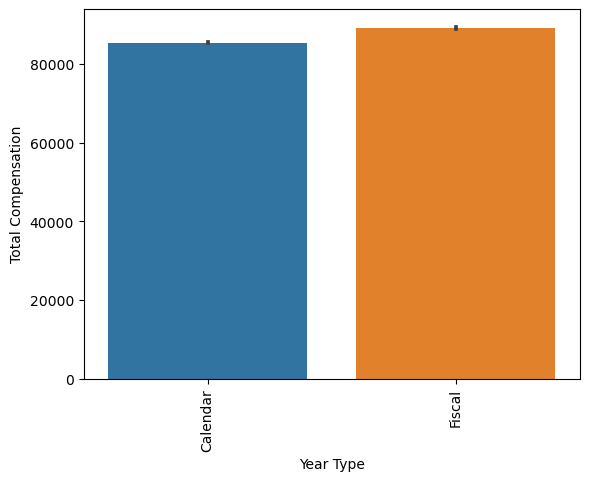

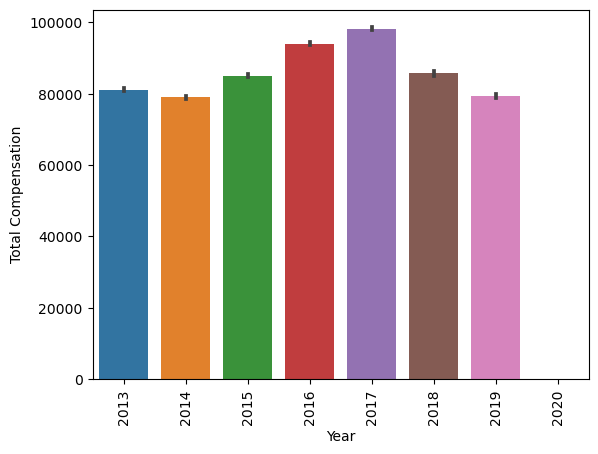

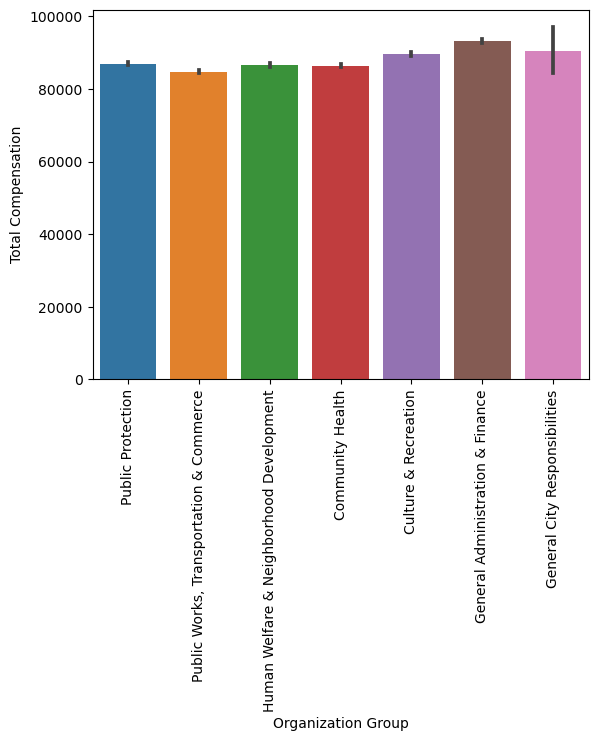

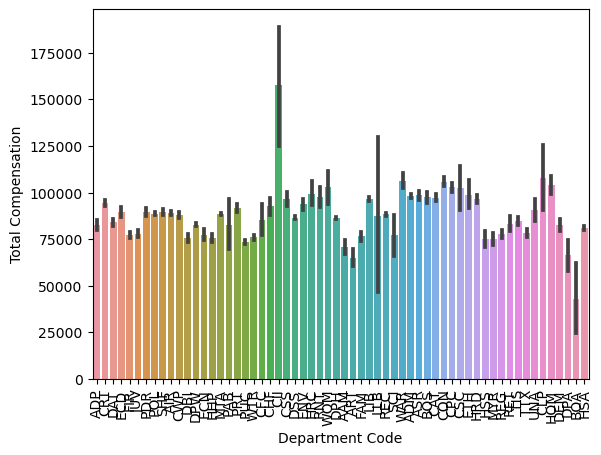

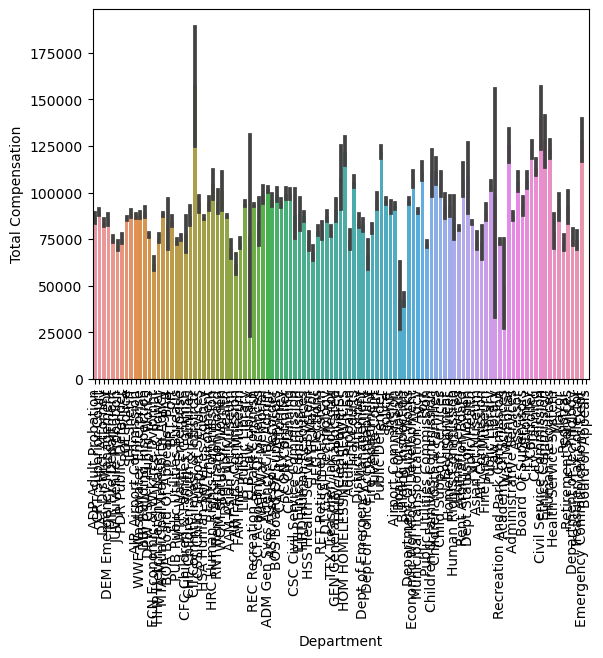

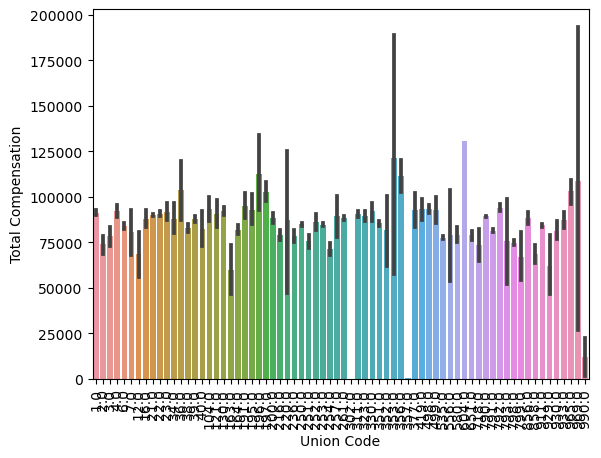

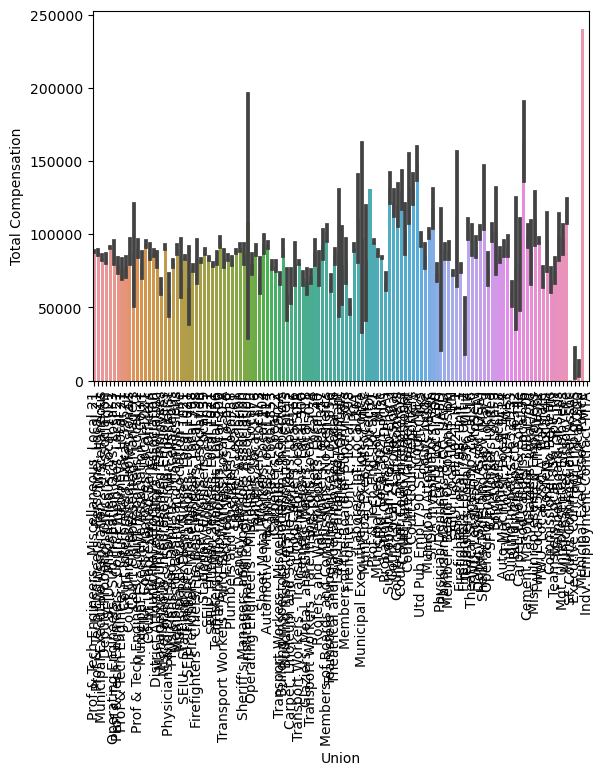

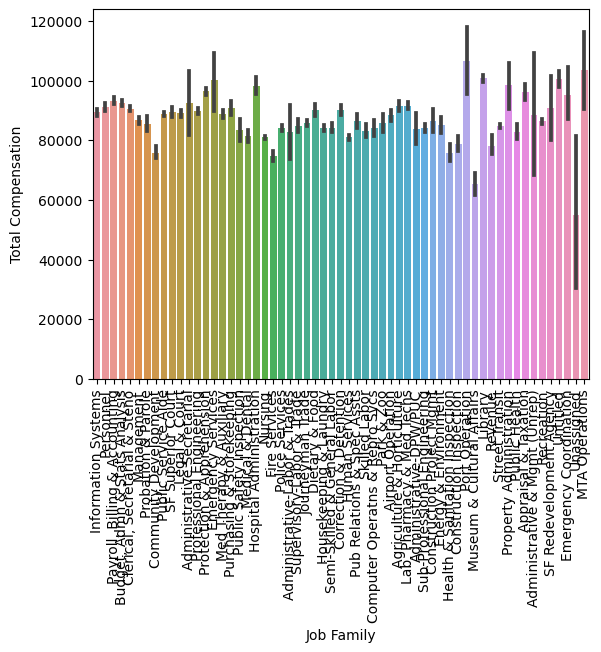

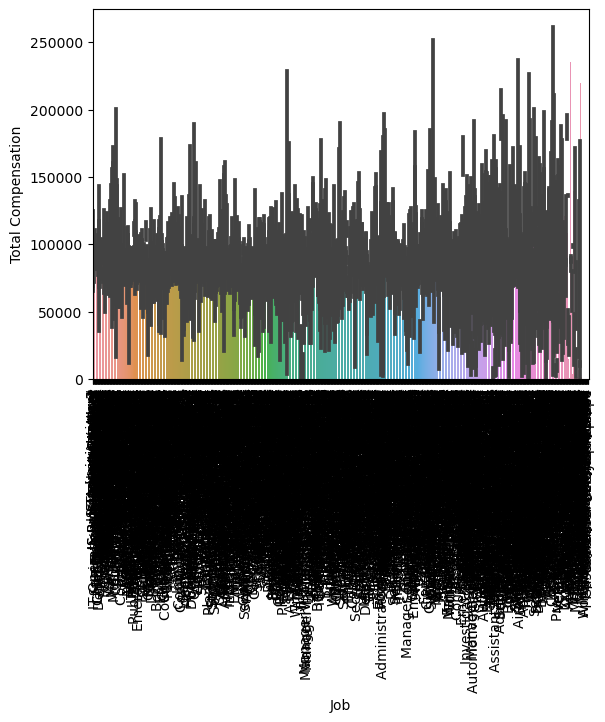

In [499]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i],y=df['Total Compensation'])
    plt.xticks(rotation='vertical')
    plt.show()

# Stats Test for Categorical

In [10]:
df_c=df_cat.drop(['Job Family','Job','Union','Department','Year Type','Organization Group'],axis=1)
df_c.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year',
       'Department Code', 'Union Code'],
      dtype='object')

In [42]:
obs=pd.crosstab(df['Organization Group Code'],df['Total Compensation'])
z_stat,p_value,ddof,exp=chi2_contingency(obs,correction=False)
p_value

4.744365077669402e-167

In [70]:
obs=pd.crosstab(df['Job Family Code'],df['Total Compensation'])
z_stat,p_value,ddof,exp=chi2_contingency(obs,correction=False)
p_value

0.0

In [76]:
obs=pd.crosstab(df['Job Code'],df['Total Compensation'])
z_stat,p_value,ddof,exp=chi2_contingency(obs,correction=False)
p_value

4.594111063326452e-234

In [73]:
obs=pd.crosstab(df['Union'],df['Total Compensation'])
z_stat,p_value,ddof,exp=chi2_contingency(obs,correction=False)
p_value

0.0

In [77]:
obs=pd.crosstab(df['Department Code'],df['Total Compensation'])
z_stat,p_value,ddof,exp=chi2_contingency(obs,correction=False)
p_value

7.294047720976614e-07

In [79]:
obs=pd.crosstab(df['Union Code'],df['Total Compensation'])
z_stat,p_value,ddof,exp=chi2_contingency(obs,correction=False)
p_value

2.916429664077585e-180

# Stats Test for Numerical

In [11]:
df_n=df_num.drop(['Employee Identifier','Total Salary','Total Compensation','Total Benefits'],axis=1)
df_n.columns

Index(['Salaries', 'Overtime', 'Other Salaries', 'Retirement',
       'Health and Dental', 'Other Benefits'],
      dtype='object')

In [82]:
for i in df_n:
    t_stat,p_value=stats.ttest_ind(df_n[i],df['Total Compensation'])
    print(i,'p_value',p_value)
    print('----------')

Salaries p_value 0.0
----------
Overtime p_value 0.0
----------
Other Salaries p_value 0.0
----------
Retirement p_value 0.0
----------
Health and Dental p_value 0.0
----------
Other Benefits p_value 0.0
----------
Total Benefits p_value 0.0
----------


In [13]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder

# Stats Model Preprocess

In [14]:
OE=OrdinalEncoder()
df_Oc=OE.fit_transform(df_c)

In [15]:
df_OC=pd.DataFrame(df_Oc,columns=df_c.columns)

In [158]:
#df_Lc=pd.DataFrame()
#LE=LabelEncoder()
#for i in df_c.columns:
#    df_Lc[i]=LE.fit_transform(df_c[i])

In [16]:
df_n.reset_index(inplace=True,drop=True)

In [160]:
#df_c.reset_index(inplace=True,drop=True)

In [17]:
X=pd.concat([df_n,df_OC],axis=1)
y=df['Total Compensation']

In [18]:
X.isnull().sum()

Salaries                   0
Overtime                   0
Other Salaries             0
Retirement                 0
Health and Dental          0
Other Benefits             0
Organization Group Code    0
Job Family Code            0
Job Code                   0
Year                       0
Department Code            0
Union Code                 0
dtype: int64

In [163]:
df_OC.shape,df_n.shape,X.shape,X_train.shape

((525694, 6), (525694, 6), (525694, 12), (367985, 13))

In [19]:
Xc=sm.add_constant(X)

In [20]:
X_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=0.3,random_state=10)

In [21]:
ss=MinMaxScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_train)

In [22]:
X_train=pd.DataFrame(X_train,columns=Xc.columns)
X_test=pd.DataFrame(X_test,columns=Xc.columns)

In [23]:
# One way ANOVA test
#H0: Both train and test data represents the whole data
#H1: Both train and test data does not represent the whole data
from scipy.stats import f_oneway
f_oneway(y_train,y_test,y)

F_onewayResult(statistic=0.13627384795205258, pvalue=0.8726036543416124)

In [89]:
y.reset_index(inplace=True,drop=True)

In [61]:
y

0          85281.78
1          79895.32
2          93649.71
3           7512.31
4          48209.58
            ...    
525689    142279.85
525690     13533.42
525691    139289.72
525692    164424.89
525693    165428.06
Name: Total Compensation, Length: 525694, dtype: float64

# Stats Model

In [24]:
model=sm.OLS(list(y_train),X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.604e+06
Date:                Thu, 16 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:27:10   Log-Likelihood:                     -4.0488e+06
No. Observations:              367985   AIC:                                  8.098e+06
Df Residuals:                  367973   BIC:                                  8.098e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                            0          0        nan        nan           0           0
Salaries                 3.643e+05    591.404    616.070      0.000    3.63e+05    3.66e+05
Overtime                 1.942e+04    149.913    129.541      0.000    1.91e+04    1.97e+04
Other Salaries          -2.215e+04    185.684   -119.298      0.000   -2.25e+04   -2.18e+04
Retirement              -3.124e+04    597.662    -52.277      0.000   -3.24e+04   -3.01e+04
Health and Dental        5.548e+04    235.986    235.089      0.000     5.5e+04    5.59e+04
Other Benefits          -7.148e+04    369.189   -193.608      0.000   -7.22e+04   -7.08e+04
Organization Group Code -2.598e+04     96.617   -268.943      0.000   -2.62e+04   -2.58e+04
Job Family Code          -1.11e+04    166.383    -66.685      0.000   -1.14e+04   -1.08e+04
Job Code                -1.345e+04    159.760    -84.203      0.000   -1.38e+04   -1.31e+04
Year                    -9577.1695     80.745   -118.611      0.000   -9735.426   -9418.913
Department Code         -2.095e+04     95.146   -220.234      0.000   -2.11e+04   -2.08e+04
Union Code              -1.869e+04     85.382   -218.849      0.000   -1.89e+04   -1.85e+04
==============================================================================
Omnibus:                     3620.463   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4913.210
Skew:                           0.141   Prob(JB):                         0.00
Kurtosis:                       3.491   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
model.pvalues[model.pvalues<0.05]
# The below mentioned columns are significant in nature.

Salaries                   0.0
Overtime                   0.0
Other Salaries             0.0
Retirement                 0.0
Health and Dental          0.0
Other Benefits             0.0
Organization Group Code    0.0
Job Family Code            0.0
Job Code                   0.0
Year                       0.0
Department Code            0.0
Union Code                 0.0
dtype: float64

In [95]:
VIF=[vif(X_train.values,i) for i in range(len(X_train.columns))]

In [96]:
pd.DataFrame(index=X_train.columns,data={'VIF':VIF}).sort_values(by=['VIF'],ascending=False)

,VIF
Retirement,154.614925
Salaries,146.408269
Other Benefits,59.660593
Health and Dental,17.972380
Job Code,16.245276
Job Family Code,14.460531
Other Salaries,12.322760
Department Code,5.104820
Union Code,5.101192
Year,3.552369


In [265]:
df_n.columns

Index(['Salaries', 'Overtime', 'Other Salaries', 'Retirement',
       'Health and Dental', 'Other Benefits'],
      dtype='object')

In [97]:
df_c.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year',
       'Department Code', 'Union Code'],
      dtype='object')

# Model with Best Features Stats Model again

In [113]:
new_OC=df_OC
new_n=df_n[['Overtime','Other Salaries','Health and Dental','Other Benefits','Salaries']]

In [114]:
X=pd.concat([new_n,new_OC],axis=1)
y=df['Total Compensation']

In [115]:
X.isnull().sum()

Overtime                   0
Other Salaries             0
Health and Dental          0
Other Benefits             0
Salaries                   0
Organization Group Code    0
Job Family Code            0
Job Code                   0
Year                       0
Department Code            0
Union Code                 0
dtype: int64

In [116]:
Xc=sm.add_constant(X)
X_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=0.3,random_state=10)

In [117]:
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Compensation   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.204e+07
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:16:08   Log-Likelihood:            -3.3846e+06
No. Observations:              367985   AIC:                         6.769e+06
Df Residuals:                  367973   BIC:                         6.769e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -475.9630     20.269    -23.482      0.000    -515.689    -436.237
Overtime                    1.0303      0.002    509.246      0.000       1.026       1.034
Other Salaries              1.0755      0.002    560.406      0.000       1.072       1.079
Health and Dental           1.2194      0.001    993.029      0.000       1.217       1.222
Other Benefits              0.9974      0.003    332.664      0.000       0.991       1.003
Salaries                    1.1728      0.000   5245.946      0.000       1.172       1.173
Organization Group Code   -62.8381      2.896    -21.699      0.000     -68.514     -57.162
Job Family Code            49.3428      0.467    105.616      0.000      48.427      50.258
Job Code                   -2.3723      0.022   -108.396      0.000      -2.415      -2.329
Year                     -112.7378      1.926    -58.526      0.000    -116.513    -108.962
Department Code             6.1776      0.282     21.903      0.000       5.625       6.730
Union Code                 -1.9350      0.216     -8.940      0.000      -2.359      -1.511
==============================================================================
Omnibus:                   170520.392   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8386173.734
Skew:                          -1.489   Prob(JB):                         0.00
Kurtosis:                      26.197   Cond. No.                     3.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
model.pvalues[model.pvalues<0.05]

const                      7.578745e-122
Overtime                    0.000000e+00
Other Salaries              0.000000e+00
Health and Dental           0.000000e+00
Other Benefits              0.000000e+00
Salaries                    0.000000e+00
Organization Group Code    2.449113e-104
Job Family Code             0.000000e+00
Job Code                    0.000000e+00
Year                        0.000000e+00
Department Code            2.821697e-106
Union Code                  3.908304e-19
dtype: float64

In [119]:
VIF=[vif(X_train.values,i) for i in range(len(X_train.columns))]
pd.DataFrame(index=X_train.columns,data={'VIF':VIF}).sort_values(by=['VIF'],ascending=False)


,VIF
const,26.479984
Other Benefits,6.377738
Salaries,6.209161
Job Family Code,4.170252
Job Code,4.133867
Health and Dental,3.288447
Organization Group Code,1.310790
Overtime,1.308416
Other Salaries,1.263045
Union Code,1.200003


In [120]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(x_test)

In [121]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE train:  2389.342832948549
RMSE test:  2379.2036153876525


# Model with Best Features for Linear Reg

In [25]:
new_OC=df_OC[['Year','Union Code','Organization Group Code','Job Code','Job Family Code','Department Code']]
new_n=df_n[['Overtime','Other Salaries','Health and Dental','Other Benefits','Salaries']]

In [26]:
X=pd.concat([new_n,new_OC],axis=1)
y=df['Total Compensation']

In [41]:
ss=MinMaxScaler()
X=ss.fit_transform(X)


In [35]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [36]:
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((367985, 11), (157709, 11), (367985,), (157709,))

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(x_test)


In [39]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE train:  2389.3428329485496
RMSE test:  2379.203615387652


In [40]:
print('R2: ',lr.score(X_train,y_train))
# The model is overfit as the  

R2:  0.998484849200321


# Ridge Model

In [310]:
from sklearn.linear_model import Ridge

In [403]:
ridge = Ridge()
ridge.fit(X_train, y_train)


Ridge()

In [404]:
y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(x_test)
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',ridge.score(X_train,y_train))

RMSE train:  10875.114178335083
RMSE test:  10821.617547421907
R2:  0.9686117883199277


# SGD Model

In [405]:
sgd = SGDRegressor(random_state = 42)
sgd.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [406]:
y_pred_train=sgd.predict(X_train)
y_pred_test=sgd.predict(x_test)
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',sgd.score(X_train,y_train))

RMSE train:  10878.345789480869
RMSE test:  10825.72047340615
R2:  0.9685931311244245


# Lasso Model

In [407]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [408]:
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(x_test)
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',lasso.score(X_train,y_train))

RMSE train:  10875.114176453715
RMSE test:  10821.616424990658
R2:  0.9686117883307879


# Elastic Net 

In [409]:
from sklearn.linear_model import ElasticNet

In [483]:
en=ElasticNet()
en.fit(X_train, y_train)

ElasticNet()

In [484]:
y_pred_train=en.predict(X_train)
y_pred_test=en.predict(x_test)
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',en.score(X_train,y_train))

RMSE train:  16545.41437738626
RMSE test:  16552.220726048985
R2:  0.9273468883975445


In [485]:
scores = cross_val_score(en, X_train, y_train, 
                         scoring='r2', cv=10)

In [486]:
scores.mean()

0.9273425650563677

# Recurrsive Feature Selection

In [172]:
from sklearn.feature_selection import RFE

In [318]:
from sklearn.pipeline import Pipeline

In [412]:
pipe=Pipeline((('rfe',RFE(estimator=Ridge())),('lr',Ridge())))

In [413]:
pipe.fit(X_train,y_train)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(x_test)


In [414]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',pipe.score(X_train,y_train))

RMSE train:  11338.830075302727
RMSE test:  11286.346306271316
R2:  0.9658779263460034


# RFE with Eastic Net

In [415]:
pipe=Pipeline((('rfe',RFE(estimator=ElasticNet())),('lr',ElasticNet())))

In [416]:
pipe.fit(X_train,y_train)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(x_test)

In [417]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',pipe.score(X_train,y_train))

RMSE train:  16506.585531882494
RMSE test:  16513.11662652124
R2:  0.9276874934947188


# RFE with Lasso

In [418]:
pipe=Pipeline((('rfe',RFE(estimator=Lasso())),('lr',Lasso())))

In [419]:
pipe.fit(X_train,y_train)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(x_test)


In [420]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',pipe.score(X_train,y_train))

RMSE train:  11338.830877991955
RMSE test:  11286.35050034336
R2:  0.9658779215149191


# RFE with SGD

In [422]:
pipe=Pipeline((
('rfe',RFE(estimator=SGDRegressor())),
('lr',SGDRegressor())))



In [423]:
pipe.fit(X_train,y_train)


y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(x_test)


In [424]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',pipe.score(X_train,y_train))

RMSE train:  11341.987905209764
RMSE test:  11289.778386594973
R2:  0.9658589179107026


# RandomForestRegressor Model

In [425]:
rf = RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1)

In [454]:
scores = cross_val_score(rf, X_train, y_train, 
                         scoring='r2', cv=10)

In [455]:
scores.mean()

0.9963446010723012

In [456]:
(scores)**0.5

array([0.99826934, 0.99803356, 0.99804625, 0.99834922, 0.99836757,
       0.99802737, 0.99790841, 0.99837092, 0.99811016, 0.99822334])

# Lets do some Feature Engineering

In [457]:
df_n['Other_Salary&Benifits']=df_n['Other Benefits']+df_n['Other Salaries']

In [458]:
df1_n=df_n.drop(['Other Benefits','Other Salaries'],axis=1)

In [467]:
X=pd.concat([df1_n,df_OC],axis=1)
y=df['Total Compensation']

In [460]:
X.isnull().sum()

Salaries                   0
Overtime                   0
Retirement                 0
Health and Dental          0
Other_Salary&Benifits      0
Organization Group Code    0
Job Family Code            0
Job Code                   0
Year                       0
Department Code            0
Union Code                 0
dtype: int64

In [468]:
Xc=sm.add_constant(X)
X_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=0.3,random_state=10)

In [469]:
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.615e+09
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:25:08   Log-Likelihood:            -2.5949e+06
No. Observations:              367985   AIC:                         5.190e+06
Df Residuals:                  367973   BIC:                         5.190e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -13.2838      2.339     -5.680      0.000     -17.867      -8.700
Salaries                    1.0022   3.92e-05   2.56e+04      0.000       1.002       1.002
Overtime                    1.0093      0.000   4325.079      0.000       1.009       1.010
Retirement                  1.0002      0.000   5155.715      0.000       1.000       1.001
Health and Dental           1.0054      0.000   6906.931      0.000       1.005       1.006
Other_Salary&Benifits       0.9718      0.000   4993.468      0.000       0.971       0.972
Organization Group Code     4.2542      0.336     12.662      0.000       3.596       4.913
Job Family Code            -1.7264      0.055    -31.184      0.000      -1.835      -1.618
Job Code                    0.0800      0.003     30.735      0.000       0.075       0.085
Year                      -18.5091      0.226    -82.034      0.000     -18.951     -18.067
Department Code            -0.1225      0.033     -3.713      0.000      -0.187      -0.058
Union Code                  0.3088      0.024     12.777      0.000       0.261       0.356
==============================================================================
Omnibus:                   591004.977   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        307023096.856
Skew:                         -10.773   Prob(JB):                         0.00
Kurtosis:                     142.857   Cond. No.                     3.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
VIF=[vif(X_train.values,i) for i in range(len(X_train.columns))]
pd.DataFrame(index=X_train.columns,data={'VIF':VIF}).sort_values(by=['VIF'],ascending=False)


,VIF
const,25.780380
Retirement,14.522603
Salaries,13.960793
Job Family Code,4.282805
Job Code,4.272417
Health and Dental,3.379822
Other_Salary&Benifits,3.317995
Organization Group Code,1.290416
Overtime,1.273125
Union Code,1.094123


In [473]:
X=pd.concat([df1_n,df_OC],axis=1)
y=df['Total Compensation']
#X.drop('Retirement',inplace=True,axis=1)

ss=StandardScaler()
X=ss.fit_transform(X)

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [474]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(x_test)

print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',lr.score(X_train,y_train))

RMSE train:  2390.996759546612
RMSE test:  2381.5535452475788
R2:  0.9984827508697725


In [478]:
en=ElasticNet()
en.fit(X_train, y_train)

y_pred_train=en.predict(X_train)
y_pred_test=en.predict(x_test)


print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R2: ',en.score(X_train,y_train))


RMSE train:  14965.916845277136
RMSE test:  14995.726538169078
R2:  0.9405563350269809


# Infernce